1 - import

2 - feature binning

3 - feature filtering

4 - feature engineering

5 - visualize new features

# import

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os

#import data files
path = r'/Users/amritambe/Desktop/CareerF Python/Insta Cart Analysis'
df_ = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Df_09242023.pkl'))
df_.shape, df_.describe()

((32434212, 31),
            order_id   customer_id  customer_order_number  orders_day_of_week  \
 count  3.243421e+07  3.243421e+07           3.243421e+07        3.243421e+07   
 mean   1.710748e+06  1.029374e+05           1.714192e+01        2.738810e+00   
 std    9.872996e+05  5.946649e+04           1.753489e+01        2.090047e+00   
 min    2.000000e+00  1.000000e+00           1.000000e+00        0.000000e+00   
 25%    8.559450e+05  5.142000e+04           5.000000e+00        1.000000e+00   
 50%    1.711049e+06  1.026125e+05           1.100000e+01        3.000000e+00   
 75%    2.565510e+06  1.543910e+05           2.400000e+01        5.000000e+00   
 max    3.421083e+06  2.062090e+05           9.900000e+01        6.000000e+00   
 
        order_hour_of_day  days_between_last_order    product_id  \
 count       3.243421e+07               30356128.0  3.243421e+07   
 mean        1.342500e+01                      NaN  2.557778e+04   
 std         4.246351e+00                      0

In [17]:
#check nans
df_['days_between_last_order'].isnull().sum()

2078084

In [3]:
#check columns

df_.columns.tolist()

['order_id',
 'customer_id',
 'customer_order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_between_last_order',
 'first_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 '_merge',
 'price_range_loc',
 'Busiest Days',
 'busiest_hours_of_day',
 'max_orders',
 'loyalty_flag',
 'avg_cust_spend',
 'Customer_Spend',
 'median_order_frequency',
 'Order_Frequency',
 'Gender',
 'State',
 'Age',
 'date_joined',
 'Dependents',
 'Marital_Status',
 'Income']

# feature binning
Regional column

In [4]:
# Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” 
# column from your customers data set.

# Region 1 (Northeast)
Northeast = [
    "Maine",
    "New Hampshire",
    "Vermont",
    "Massachusetts",
    "Rhode Island",
    "Connecticut",
    "New York",
    "Pennsylvania",
    "New Jersey"
]

# Region 2 (Midwest)
Midwest = [
    "Wisconsin",
    "Michigan",
    "Illinois",
    "Indiana",
    "Ohio",
    "North Dakota",
    "South Dakota",
    "Nebraska",
    "Kansas",
    "Minnesota",
    "Iowa",
    "Missouri"
]

# Region 3 (South)
South = [
    "Delaware",
    "Maryland",
    "District of Columbia",
    "Virginia",
    "West Virginia",
    "North Carolina",
    "South Carolina",
    "Georgia",
    "Florida",
    "Kentucky",
    "Tennessee",
    "Mississippi",
    "Alabama",
    "Oklahoma",
    "Texas",
    "Arkansas",
    "Louisiana"
]

# Region 4 (West)
West = [
    "Idaho",
    "Montana",
    "Wyoming",
    "Nevada",
    "Utah",
    "Colorado",
    "Arizona",
    "New Mexico",
    "Alaska",
    "Washington",
    "Oregon",
    "California",
    "Hawaii"
]


In [5]:
# Determine whether there’s a difference in spending habits between the different U.S. regions.

#initialize new region column
df_['Region'] = 'Other'

#create flag column
df_.loc[df_['State'].isin(West), 'Region']='West'
df_.loc[df_['State'].isin(Northeast), 'Region']='Northeast'
df_.loc[df_['State'].isin(South), 'Region']='South'
df_.loc[df_['State'].isin(Midwest), 'Region']='Midwest'

In [6]:
#check new column
df_['Region'].value_counts()

South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: Region, dtype: int64

analyze new regional feature

In [7]:
# check avg_cust_spend for each region

avg_spend = df_.groupby('Region')['avg_cust_spend'].mean()
avg_spend

Region
Midwest      7.796875
Northeast    7.789062
South        7.800781
West         7.796875
Name: avg_cust_spend, dtype: float16

These are very similar avg spending habits, so the conclusion is there is minimal difference between the regions

In [8]:
#change data type to avoid overflow
df_['avg_cust_spend'] = df_['avg_cust_spend'].astype('float32')
df_['avg_cust_spend'].dtypes

dtype('float32')

In [9]:
#create bar chart to show avg customer spend

#more efficient df
df_bar = df_[['Region', 'avg_cust_spend']]
#sample df
df_bar_sample = df_bar.sample(frac=0.3, random_state=4)

#plot the df_bar_sample
#bar = sns.barplot(x='Region', y='avg_cust_spend', data=df_bar_sample)

In [10]:
df_['max_orders'].dtypes

dtype('int16')

# feature filtering
exclude low-activity customers

In [11]:
#Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them

df = df_[df_['max_orders'] >= 5]

#checking how many customers were dropped
df_['customer_id'].nunique(), df['customer_id'].nunique()

(206209, 162633)

In [12]:
#how many customers dropped
print(df_['customer_id'].nunique() - df['customer_id'].nunique())

43576


In [15]:
df.shape

(30992664, 32)

In [12]:
#export new df
#df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'High_Activity_Cust_0925.pkl'))

Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of 
dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can 
think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics
would lead you to the profile “Single adult” or “Young parent.”)

# feature engineering
Weekend Shoppers

In [13]:
#Weekend shopping profile

# Define a custom aggregation function
def weekend_proportion(x):
    weekend_days = [0, 6]
    weekend_orders = x[x.isin(weekend_days)].count()
    total_orders = x.count()
    return weekend_orders / total_orders

# Group by 'customer_id' and calculate the weekend proportion
customer_weekend_proportion = df.groupby('customer_id')['orders_day_of_week'].agg(weekend_proportion).reset_index()
customer_weekend_proportion.head(20)

,customer_id,orders_day_of_week
0,1,0.000000
1,2,0.000000
2,3,0.522727
3,4,0.222222
4,7,0.427184
5,10,0.000000
6,11,0.138298
7,12,0.000000
8,13,0.938272
9,14,0.142857


In [14]:
#rename new df cols
customer_weekend_proportion.rename(columns={'orders_day_of_week':'weekend_ratio'}, inplace=True)
customer_weekend_proportion.columns

Index(['customer_id', 'weekend_ratio'], dtype='object')

In [15]:
#add data to df_(orginal dataframe) as weekend_ratio
df_ = df_.merge(customer_weekend_proportion, on='customer_id')
df_.columns.tolist()

['order_id',
 'customer_id',
 'customer_order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_between_last_order',
 'first_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 '_merge',
 'price_range_loc',
 'Busiest Days',
 'busiest_hours_of_day',
 'max_orders',
 'loyalty_flag',
 'avg_cust_spend',
 'Customer_Spend',
 'median_order_frequency',
 'Order_Frequency',
 'Gender',
 'State',
 'Age',
 'date_joined',
 'Dependents',
 'Marital_Status',
 'Income',
 'Region',
 'weekend_ratio']

In [16]:
df_['customer_id'].nunique()

162633

In [17]:
#create flag for weekend customers spending > 65% on the weekend
#initialize new column
df_['weekend_customer'] = 'False'

#identify weekend focused customers
df_.loc[df_['weekend_ratio']>0.65, 'weekend_customer'] = 'True'

df_['weekend_customer'].head(12), df_['weekend_customer'].value_counts()

(0     False
 1     False
 2     False
 3     False
 4     False
 5     False
 6     False
 7     False
 8     False
 9     False
 10    False
 11    False
 Name: weekend_customer, dtype: object,
 False    27848590
 True      3144074
 Name: weekend_customer, dtype: int64)

# feature binning
Age

In [18]:
#Age profile

# Create a new column with age groups
df_['age_group'] = pd.cut(df_['Age'], bins=[17, 35, 52, 69, 86], 
                         labels=['young', 'adult', 'midlife', 'elder'],
                         )
# check the DataFrame 
df_['age_group'].value_counts()

young      8746779
adult      8258069
midlife    8170060
elder      5817756
Name: age_group, dtype: int64

# feature binning 
Income

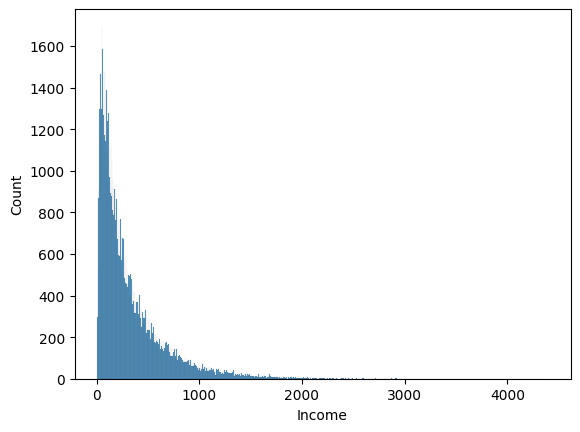

In [19]:
#Income Profile

#explore income distribution, histogram
hist = sns.histplot(df_['Income'].value_counts(), bins=1000)

In [20]:
#save income histogram

#hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Income_Histogram.png'))

In [21]:
#check income min max mean
df_['Income'].agg(['min', 'max', 'mean', 'std'])

min      25903.000000
max     593901.000000
mean     99673.220008
std      43139.283114
Name: Income, dtype: float64

In [22]:
#Income columns: Average-one std below to one std above mean 
                #Above average-above 1 std above the mean
                #Below average-below 1 std below the mean

#get mean and std
mean_inc = df_['Income'].agg('mean')
std_inc = df_['Income'].agg('std')

#create lower and upper bounds of the income brackets
lower_bound = mean_inc - std_inc
upper_bound = mean_inc + std_inc

#define brackets
above_average = (round(lower_bound, -1), round(upper_bound, -1))
below_average = (0, round(lower_bound, -1))
above_average = (round(upper_bound, -1), 1000000) 

#print results
print(f'Average Income: {round(lower_bound, -1): .0f} to {round(upper_bound, -1): .0f}\n'
      f'Below Average Income: Below {round(lower_bound, -1): .0f}\n'
      f'Above Average Income: Above {round(upper_bound, -1): .0f}')


Average Income:  56530 to  142810
Below Average Income: Below  56530
Above Average Income: Above  142810


In [23]:
#make an income bracket column using pd.cut()
df_['income_brackets'] = pd.cut(df_['Income'], 
                                bins=[0, lower_bound, upper_bound, 1000000], 
                                labels=['below_average', 'average', 'above_average']
                               )
#check
df_['income_brackets'].value_counts()

average          20939684
above_average     5180532
below_average     4872448
Name: income_brackets, dtype: int64

# feature engineering
Department profiles

In [24]:
#Department Id profile

#change data type to avoid errors
df_['prices'] = df_['prices'].astype('float64')
#explore 
dept = df_.groupby('department_id')['prices'].sum().dropna()
dept.name = 'total_revenue'
dept.head(22)

department_id
1     1.643176e+07
2     2.395708e+05
3     8.852088e+06
4     7.245336e+07
5     1.179298e+06
6     1.965755e+06
7     1.975880e+07
8     7.340897e+05
9     6.042226e+06
10    2.792094e+05
11    3.394754e+06
12    1.099859e+07
13    1.428991e+07
14    5.471075e+06
15    7.637855e+06
16    4.332733e+07
17    5.164902e+06
18    3.133079e+06
19    1.182802e+07
20    7.812815e+06
21    5.609018e+05
Name: total_revenue, dtype: float64

In [25]:
#product name profile

#explore
prod = df_.groupby('product_name')['prices'].sum()
prod.name = 'product_revenue'
prod.describe(), prod.head()
prod_s = prod.sort_values(ascending=False)
print(prod_s.head(20))

product_name
Banana                      5.572501e+06
Bag of Organic Bananas      3.772806e+06
Large Lemon                 2.035558e+06
Limes                       1.981261e+06
Organic Baby Spinach        1.901255e+06
Organic Strawberries        1.868912e+06
Organic Whole Milk          1.708562e+06
Cucumber Kirby              1.222768e+06
Apple Honeycrisp Organic    1.161250e+06
Organic Cucumber            1.107994e+06
Organic Avocado             1.060214e+06
Asparagus                   9.171159e+05
Organic Baby Carrots        8.703380e+05
Michigan Organic Kale       8.631005e+05
Organic Hass Avocado        8.271960e+05
Organic Tomato Cluster      8.171678e+05
Organic Zucchini            7.950883e+05
Organic Blueberries         7.934882e+05
Half & Half                 7.644818e+05
Carrots                     7.477096e+05
Name: product_revenue, dtype: float64


Text(0.5, 1.0, 'Top 25 Products by Revenue')

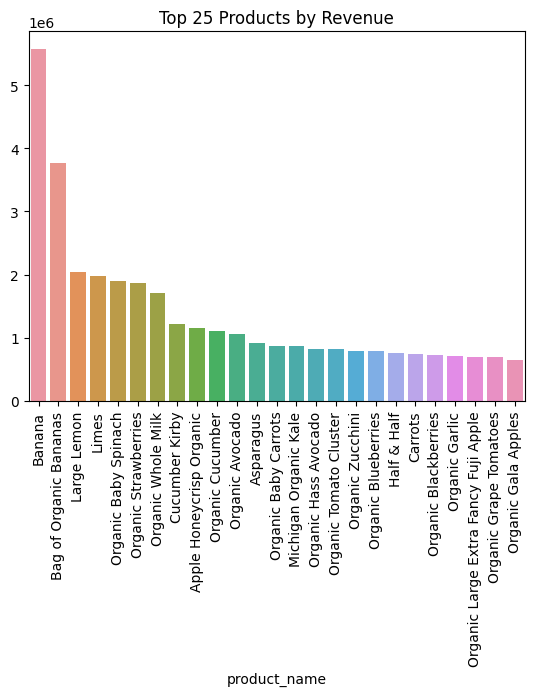

In [26]:
#bar plot of top 25 products

top_25 = prod_s.head(25)
bar = sns.barplot(x=top_25.index, y=top_25.values)
bar.set_xticklabels(bar.get_xticklabels(), rotation=90, ha="center")
plt.title('Top 25 Products by Revenue')



In [27]:
#save chart
#bar.figure.savefig(os.path.join(path, '04 Analysis', 'Top_25_Products.png'))

In [28]:
df_['product_name'].nunique(), df_['product_name'].describe()

(49630,
 count     30965692
 unique       49630
 top         Banana
 freq        453164
 Name: product_name, dtype: object)

49,630 unique products

top 1%: 496
top 10%: 4,963

In [29]:
len(prod_s)

49630

In [30]:
#create lists of top 1% and top10% of products

top_percent = prod_s.head(496)
top_ten_percent = prod_s.head(4963)

#create columns for flag top_1_percent, top_10_percent

df_['top_one_percent'] = df_['product_name'].isin(top_percent.index)
df_['top_ten_percent'] = df_['product_name'].isin(top_ten_percent.index)

#check
df_.columns.tolist()

['order_id',
 'customer_id',
 'customer_order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_between_last_order',
 'first_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 '_merge',
 'price_range_loc',
 'Busiest Days',
 'busiest_hours_of_day',
 'max_orders',
 'loyalty_flag',
 'avg_cust_spend',
 'Customer_Spend',
 'median_order_frequency',
 'Order_Frequency',
 'Gender',
 'State',
 'Age',
 'date_joined',
 'Dependents',
 'Marital_Status',
 'Income',
 'Region',
 'weekend_ratio',
 'weekend_customer',
 'age_group',
 'income_brackets',
 'top_one_percent',
 'top_ten_percent']

In [31]:
#check
df_['top_one_percent'].value_counts()

False    18710875
True     12281789
Name: top_one_percent, dtype: int64

In [32]:
#check
df_['top_ten_percent'].value_counts()

True     24436093
False     6556571
Name: top_ten_percent, dtype: int64

In [33]:
#find revenue from top 1% of products

top_one_percent_rev = df_.groupby('top_one_percent')['prices'].sum()
top_one_percent_rev

top_one_percent
False    1.276324e+08
True     1.139230e+08
Name: prices, dtype: float64

Nearly half of revenue is generated by the top 1% of products

In [34]:
#find revenue for top 10% of products

top_ten_percent_rev = df_.groupby('top_ten_percent')['prices'].sum()
top_ten_percent_rev

top_ten_percent
False    3.915485e+07
True     2.024005e+08
Name: prices, dtype: float64

In [35]:
# find exact ratio for top 1% and top 10% of sales
one_percent_ratio = top_one_percent_rev[True] / (top_one_percent_rev[True]+top_one_percent_rev[False])
ten_percent_ratio = top_ten_percent_rev[True] / (top_ten_percent_rev[True]+top_ten_percent_rev[False])

#print results
print(f'top 1% of products generate: {one_percent_ratio * 100: 0.2f}% of total revenue.\n'
      f'top 10% of products generate: {ten_percent_ratio * 100: 0.2f}% of total revenue.\n')

top 1% of products generate:  47.16% of total revenue.
top 10% of products generate:  83.79% of total revenue.



# Feature Engineering
Dependents profile

In [36]:
#dependent profile

#explore dependent data

df_.groupby('Dependents')['prices'].agg(['sum', 'mean', 'min', 'max'])

,sum,mean,min,max
Dependents,,,,
0,6.037387e+07,7.794341,1.0,25.0
1,6.025676e+07,7.800409,1.0,25.0
2,6.027493e+07,7.788604,1.0,25.0
3,6.064983e+07,7.797367,1.0,25.0


the sum of prices (the total revenue per # of dependents) and the mean (avg product price) are extremely similar between dependent groups, indicating similar total spending between customers regardless of number of dependents. 

In [37]:
df_.groupby('Dependents')['Age'].agg(['mean', 'min', 'max'])

,mean,min,max
Dependents,,,
0,49.507118,18,81
1,49.345811,18,81
2,49.578665,18,81
3,49.440023,18,81


In [38]:
#create flag for childless

#init flag
df_['Children'] = 'Yes'
#change 0 dependents
df_.loc[df_['Dependents']==0, 'Children'] = 'No'

#check
df_['Children'].value_counts()

Yes    23245632
No      7747032
Name: Children, dtype: int64

In [39]:
#compare rev between yes and no flags
children_rev = df_.groupby('Children')['prices'].sum()
children_rev.name = 'children_revenue'
children_rev

Children
No     6.037387e+07
Yes    1.811815e+08
Name: children_revenue, dtype: float64

# feature engineering
Time of Day profiles

In [40]:
#Time of day profile

#explore time of day
df_['order_hour_of_day'].value_counts()

#create efficient df
hour_bar = df_.groupby('order_hour_of_day')['prices'].sum()
#sample
#hour_bar_s = hour_bar.sample(frac=0.3, random_state=4)
hour_bar.describe(), hour_bar.head(10), hour_bar.shape

(count    2.400000e+01
 mean     1.006481e+07
 std      8.025218e+06
 min      3.824421e+05
 25%      2.057297e+06
 50%      8.294226e+06
 75%      1.900921e+07
 max      2.056004e+07
 Name: prices, dtype: float64,
 order_hour_of_day
 0    1.627101e+06
 1    8.567196e+05
 2    5.131441e+05
 3    3.824421e+05
 4    3.985014e+05
 5    6.621788e+05
 6    2.200695e+06
 7    6.761609e+06
 8    1.294514e+07
 9    1.835060e+07
 Name: prices, dtype: float64,
 (24,))

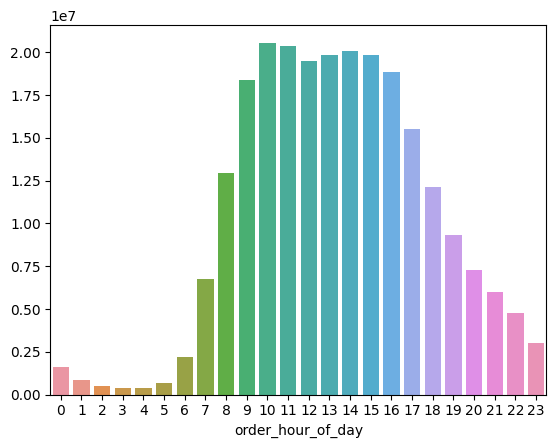

In [41]:
#bar plot
bar2 = sns.barplot(x=hour_bar.index, y=hour_bar.values)


In [42]:
#save daily revenue chart

#bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Hourly_Revenue.png'))

In [43]:
#looks like the majority of revenue happens from 9a-5p. 
#create a flag to identify >65% activity outside normal hours: Nightowls

#Create flag for nighttime orders
df_['Nightowl_Orders'] = pd.cut(df_['order_hour_of_day'], 
                                  bins=[0, 8, 16, 25],
                                  labels=['Nighttime', 'Daytime', 'Nighttime'], 
                                ordered=False)

In [44]:
#check
df_['Nightowl_Orders'].value_counts()


Daytime      20199259
Nighttime    10585197
Name: Nightowl_Orders, dtype: int64

In [45]:
#create ratio of nighttime to daytime orders for each customer

#group by customer_id and Nightowl_Orders
night_cust = df_.groupby(['customer_id', 'Nightowl_Orders'])['prices'].sum()
night_cust.head()

customer_id  Nightowl_Orders
1            Daytime             194.591797
             Nighttime           181.092773
2            Daytime            1465.566406
             Nighttime             0.000000
3            Daytime             406.188477
Name: prices, dtype: float64

In [46]:
#pivot night_cust df
night_cust_ = night_cust.unstack(level='Nightowl_Orders')
night_cust_.head(10)

Nightowl_Orders,Daytime,Nighttime
customer_id,,
1,194.591797,181.092773
2,1465.566406,0.000000
3,406.188477,315.197266
4,147.695312,0.000000
7,1021.857422,516.267578
10,728.268555,508.779297
11,782.881836,0.000000
12,503.575195,97.000000
13,313.991211,391.392578


In [47]:
#find ratio for each customer_id

night_cust_['Nightowl_Ratio'] = night_cust_['Nighttime']/(night_cust_['Daytime']+night_cust_['Nighttime'])
night_cust_.head(10)

Nightowl_Orders,Daytime,Nighttime,Nightowl_Ratio
customer_id,,,
1,194.591797,181.092773,0.482034
2,1465.566406,0.000000,0.000000
3,406.188477,315.197266,0.436933
4,147.695312,0.000000,0.000000
7,1021.857422,516.267578,0.335647
10,728.268555,508.779297,0.411285
11,782.881836,0.000000,0.000000
12,503.575195,97.000000,0.161512
13,313.991211,391.392578,0.554865


In [48]:
#ready data to merge with df_
night_cust_.reset_index(inplace=True)  #make 'customer_id' a column, not the index
night_ratio = night_cust_[['customer_id', 'Nightowl_Ratio']]
#merge with df_
df_ = df_.merge(night_ratio, on='customer_id', how='inner')

In [49]:
df_.columns.tolist()

['order_id',
 'customer_id',
 'customer_order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_between_last_order',
 'first_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 '_merge',
 'price_range_loc',
 'Busiest Days',
 'busiest_hours_of_day',
 'max_orders',
 'loyalty_flag',
 'avg_cust_spend',
 'Customer_Spend',
 'median_order_frequency',
 'Order_Frequency',
 'Gender',
 'State',
 'Age',
 'date_joined',
 'Dependents',
 'Marital_Status',
 'Income',
 'Region',
 'weekend_ratio',
 'weekend_customer',
 'age_group',
 'income_brackets',
 'top_one_percent',
 'top_ten_percent',
 'Children',
 'Nightowl_Orders',
 'Nightowl_Ratio']

In [50]:
#check
df_.head(10)

,order_id,customer_id,customer_order_number,orders_day_of_week,order_hour_of_day,days_between_last_order,first_order,product_id,add_to_cart_order,reordered,...,Region,weekend_ratio,weekend_customer,age_group,income_brackets,top_one_percent,top_ten_percent,Children,Nightowl_Orders,Nightowl_Ratio
0,2539329,1,1,2,8,NaN,True,196,1,0,...,South,0.0,False,young,below_average,True,True,Yes,Nighttime,0.482034
1,2398795,1,2,3,7,15.0,False,196,1,1,...,South,0.0,False,young,below_average,True,True,Yes,Nighttime,0.482034
2,473747,1,3,3,12,21.0,False,196,1,1,...,South,0.0,False,young,below_average,True,True,Yes,Daytime,0.482034
3,2254736,1,4,4,7,29.0,False,196,1,1,...,South,0.0,False,young,below_average,True,True,Yes,Nighttime,0.482034
4,431534,1,5,4,15,28.0,False,196,1,1,...,South,0.0,False,young,below_average,True,True,Yes,Daytime,0.482034
5,3367565,1,6,2,7,19.0,False,196,1,1,...,South,0.0,False,young,below_average,True,True,Yes,Nighttime,0.482034
6,550135,1,7,1,9,20.0,False,196,1,1,...,South,0.0,False,young,below_average,True,True,Yes,Daytime,0.482034
7,3108588,1,8,1,14,14.0,False,196,2,1,...,South,0.0,False,young,below_average,True,True,Yes,Daytime,0.482034
8,2295261,1,9,1,16,0.0,False,196,4,1,...,South,0.0,False,young,below_average,True,True,Yes,Daytime,0.482034
9,2550362,1,10,4,8,30.0,False,196,1,1,...,South,0.0,False,young,below_average,True,True,Yes,Nighttime,0.482034


In [51]:
#create flag, true false, if customer spends over 65% at night

#what is the threshold for a customer being a Nightowl?
threshold = 0.65

#create new column, boolean
df_['Nightowl_Customer'] = df_['Nightowl_Ratio'] >= threshold

#check
df_['Nightowl_Customer'].value_counts()

False    28700831
True      2291833
Name: Nightowl_Customer, dtype: int64

In [52]:
df_['customer_id'].nunique(), df_.shape

(162633, (30992664, 42))

In [53]:
df_.columns.tolist()

['order_id',
 'customer_id',
 'customer_order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_between_last_order',
 'first_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 '_merge',
 'price_range_loc',
 'Busiest Days',
 'busiest_hours_of_day',
 'max_orders',
 'loyalty_flag',
 'avg_cust_spend',
 'Customer_Spend',
 'median_order_frequency',
 'Order_Frequency',
 'Gender',
 'State',
 'Age',
 'date_joined',
 'Dependents',
 'Marital_Status',
 'Income',
 'Region',
 'weekend_ratio',
 'weekend_customer',
 'age_group',
 'income_brackets',
 'top_one_percent',
 'top_ten_percent',
 'Children',
 'Nightowl_Orders',
 'Nightowl_Ratio',
 'Nightowl_Customer']

In [54]:
#import department names from departments.csv
department_name = pd.read_csv(os.path.join(path, '02 Data', 'original Data', 'departments.csv'))
department_name.reset_index(drop=True, inplace=True)
department_names = department_name.T
department_names.reset_index(drop=True, inplace=True)
department_names.columns = ['department_names']
department_names, department_names.columns.tolist()

(   department_names
 0        department
 1            frozen
 2             other
 3            bakery
 4           produce
 5           alcohol
 6     international
 7         beverages
 8              pets
 9   dry goods pasta
 10             bulk
 11    personal care
 12     meat seafood
 13           pantry
 14        breakfast
 15     canned goods
 16       dairy eggs
 17        household
 18           babies
 19           snacks
 20             deli
 21          missing,
 ['department_names'])

In [55]:
department_names.reset_index(inplace=True)

# Merge 'df_' with 'department_names' on the 'department_id' column
df_full = df_.merge(department_names, left_on='department_id', right_index=True)
df_full.head()

,order_id,customer_id,customer_order_number,orders_day_of_week,order_hour_of_day,days_between_last_order,first_order,product_id,add_to_cart_order,reordered,...,age_group,income_brackets,top_one_percent,top_ten_percent,Children,Nightowl_Orders,Nightowl_Ratio,Nightowl_Customer,index,department_names
0,2539329,1,1,2,8,NaN,True,196,1,0,...,young,below_average,True,True,Yes,Nighttime,0.482034,False,7,beverages
1,2398795,1,2,3,7,15.0,False,196,1,1,...,young,below_average,True,True,Yes,Nighttime,0.482034,False,7,beverages
2,473747,1,3,3,12,21.0,False,196,1,1,...,young,below_average,True,True,Yes,Daytime,0.482034,False,7,beverages
3,2254736,1,4,4,7,29.0,False,196,1,1,...,young,below_average,True,True,Yes,Nighttime,0.482034,False,7,beverages
4,431534,1,5,4,15,28.0,False,196,1,1,...,young,below_average,True,True,Yes,Daytime,0.482034,False,7,beverages


In [56]:
#check df_full and export 
df_full.isnull().sum()

order_id                         0
customer_id                      0
customer_order_number            0
orders_day_of_week               0
order_hour_of_day                0
days_between_last_order    1662886
first_order                      0
product_id                       0
add_to_cart_order                0
reordered                        0
product_name                 26972
aisle_id                         0
department_id                    0
prices                        4877
_merge                           0
price_range_loc                  0
Busiest Days                     0
busiest_hours_of_day             0
max_orders                       0
loyalty_flag                     0
avg_cust_spend                   0
Customer_Spend                   0
median_order_frequency           0
Order_Frequency                  0
Gender                           0
State                            0
Age                              0
date_joined                      0
Dependents          

In [57]:
#Create an appropriate visualization to show the distribution of profiles.

df_full.columns.tolist()

['order_id',
 'customer_id',
 'customer_order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_between_last_order',
 'first_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 '_merge',
 'price_range_loc',
 'Busiest Days',
 'busiest_hours_of_day',
 'max_orders',
 'loyalty_flag',
 'avg_cust_spend',
 'Customer_Spend',
 'median_order_frequency',
 'Order_Frequency',
 'Gender',
 'State',
 'Age',
 'date_joined',
 'Dependents',
 'Marital_Status',
 'Income',
 'Region',
 'weekend_ratio',
 'weekend_customer',
 'age_group',
 'income_brackets',
 'top_one_percent',
 'top_ten_percent',
 'Children',
 'Nightowl_Orders',
 'Nightowl_Ratio',
 'Nightowl_Customer',
 'index',
 'department_names']

In [58]:
#df_full.drop(columns=['index'], inplace=True)
df_full.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['order_id', 'customer_id', 'customer_order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_between_last_order',
       'first_order', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'prices', '_merge',
       'price_range_loc', 'Busiest Days', 'busiest_hours_of_day', 'max_orders',
       'loyalty_flag', 'avg_cust_spend', 'Customer_Spend',
       'median_order_frequency', 'Order_Frequency', 'Gender', 'State', 'Age',
       'date_joined', 'Dependents', 'Marital_Status', 'Income', 'Region',
       'weekend_ratio', 'weekend_customer', 'age_group', 'income_brackets',
       'top_one_percent', 'top_ten_percent', 'Children', 'Nightowl_Orders',
       'Nightowl_Ratio', 'Nightowl_Customer', 'index', 'department_names'],
      dtype='object')>

In [59]:
#export
#df_full.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Df_Full_0926.pkl'))

# visualize new features
Create Visualizations of New Profiles

Text(0.5, 1.0, 'Department Total Revenue')

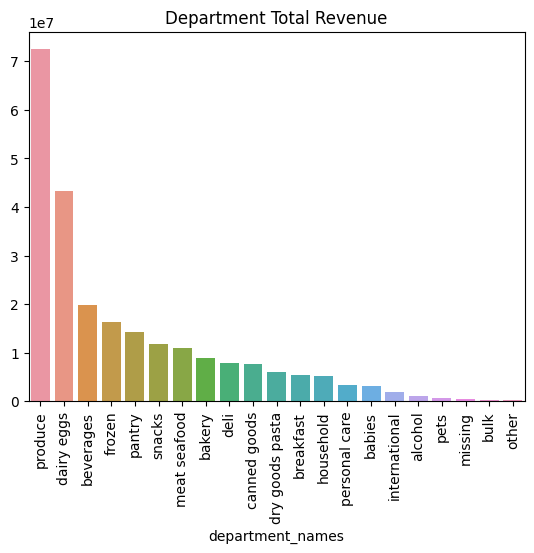

In [60]:
#Department Names

#sample df
dn = df_full.groupby('department_names')['prices'].sum()

#order by total revenue
dn.sort_values(ascending=False, inplace=True)
#plot
dn_plot = sns.barplot(x=dn.index, y=dn.values)

#format
plt.xticks(rotation=90)
plt.title('Department Total Revenue')

In [61]:
#export 
#dn_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Departments_Rev.png'))

Text(0.5, 1.0, 'Total Revenue by Region')

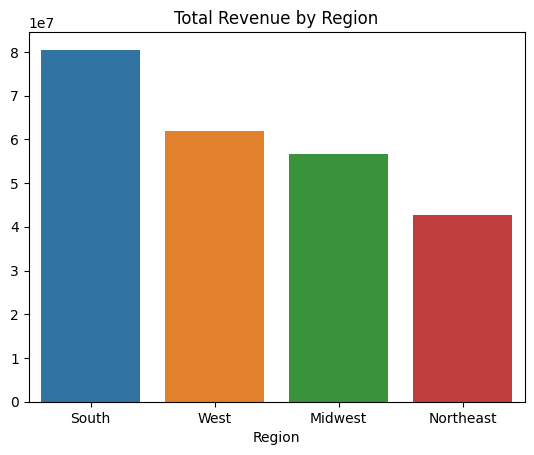

In [62]:
#Region

#group by region, look at total revenue
reg = df_full.groupby('Region')['prices'].sum()

#order
reg = reg.sort_values(ascending=False)

#bar plot reg
reg_plot = sns.barplot(x=reg.index, y=reg.values)

#format
plt.title('Total Revenue by Region')

In [63]:
#export

#reg_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Regional_Revenue.png'))

Text(0.5, 1.0, 'Weekend Customer Revenue: >65% Weekend Spending')

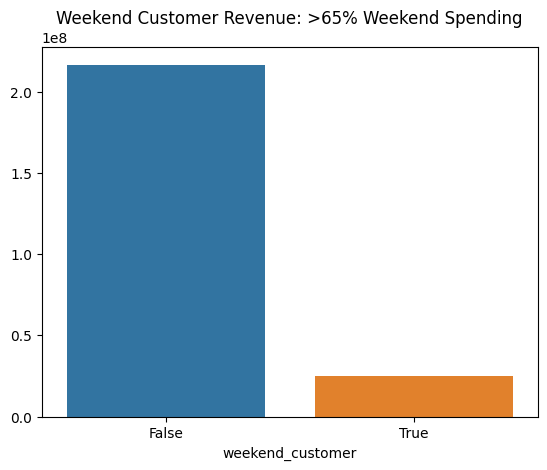

In [64]:
#Weekend

wknd = df_full.groupby('weekend_customer')['prices'].sum()

wknd_plot = sns.barplot(x=wknd.index, y=wknd.values)

plt.title('Weekend Customer Revenue: >65% Weekend Spending')

In [65]:
#export

#wknd_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Weekend_Revenue.png'))

Text(0.5, 1.0, 'Age Brackets Revenue')

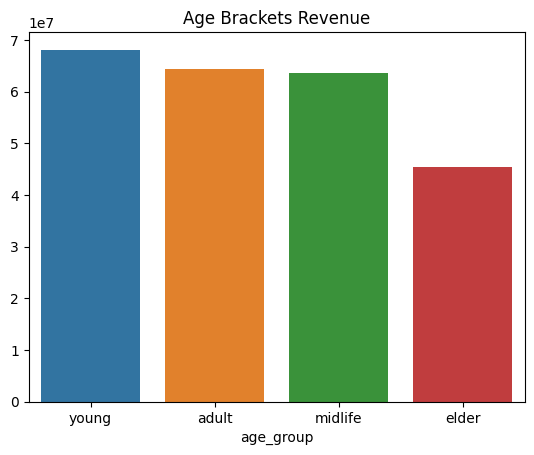

In [66]:
#Age Group

#age group df

age = df_full.groupby('age_group')['prices'].sum()

#order
age = age.sort_values(ascending=False)

#plot
age_plot = sns.barplot(x=age.index, y=age.values)

#format
plt.title('Age Brackets Revenue')

In [67]:
#export
#age_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Age_Bracket_Revenue.png'))

Text(0.5, 1.0, 'Income Bracket Revenue')

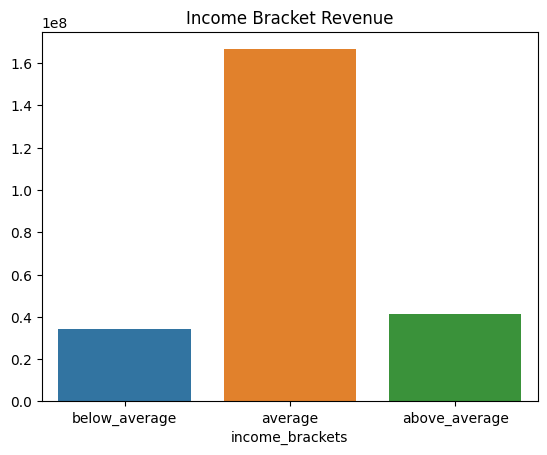

In [68]:
#Income Brackets

#income df
inc = df_full.groupby('income_brackets')['prices'].sum()

#normalize by population
#inc_pc = inc/df_full[df_full['income_brackets']=='below average'].shape[0]

#plot
inc_plot = sns.barplot(x=inc.index, y=inc.values)

#format
plt.title('Income Bracket Revenue')

It looks like 3 income brackets are not sufficient. we will make a 2nd income_brackets column to break up the average brackets into low and high income.

# feature engineering
re-work Income binning

In [69]:
#make an income bracket column with 4 brackets, very low, low, high, very high

#Income columns 2: low income-one std below to mean 
                #high income-mean to one std above
                #very high income-above 1 std above the mean
                #very low income-below 1 std below the mean

#get mean and std
mean_inc2 = df_['Income'].agg('mean')
std_inc2 = df_['Income'].agg('std')

#create lower and upper bounds of the income brackets
lower_bound2 = mean_inc2 - std_inc2
upper_bound2 = mean_inc2 + std_inc2

#define brackets
very_low = (0, round(lower_bound2, -1))
low = (round(lower_bound2, -1), mean_inc2)
high = (mean_inc2, round(upper_bound2, -1)) 
very_high = (round(upper_bound2, -1), 1000000)

#print results
print(f'Very Low Income: $0 to ${round(lower_bound2, -1): .0f}\n'
      f'Low Income: ${round(lower_bound, -1): .0f} to ${round(mean_inc2, -1): .0f}\n'
      f'High Income: ${round(mean_inc2, -1): .0f} to ${round(upper_bound2, -1): .0f}\n'
      f'Very High Income: ${round(upper_bound2, -1): .0f} to $1,000,000')


#make an income bracket column using pd.cut()
df_full['income_brackets_2'] = pd.cut(df_full['Income'], 
                                bins=[0, lower_bound2, mean_inc2, upper_bound2, 1000000], 
                                labels=['very_low', 'low', 'high', 'very_high']
                               )
#check
df_full['income_brackets_2'].value_counts()

Very Low Income: $0 to $ 56530
Low Income: $ 56530 to $ 99670
High Income: $ 99670 to $ 142810
Very High Income: $ 142810 to $1,000,000


low          11765397
high          9174287
very_high     5180532
very_low      4872448
Name: income_brackets_2, dtype: int64

Text(0.5, 1.0, 'Income Bracket Revenue2')

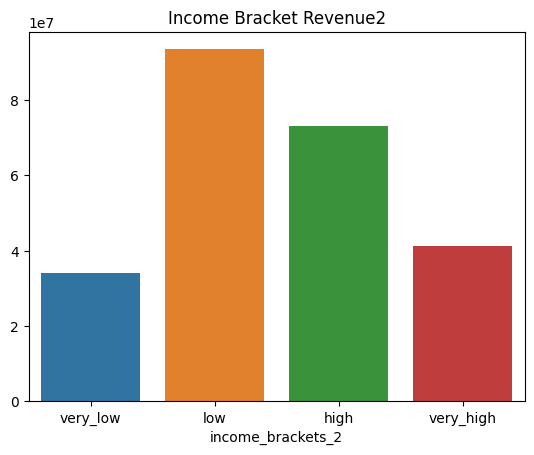

In [70]:
#graph new column
#Income Brackets2

#income df
inc2 = df_full.groupby('income_brackets_2')['prices'].sum()

#plot
inc_plot2 = sns.barplot(x=inc2.index, y=inc2.values)

#format
plt.title('Income Bracket Revenue2')


In [71]:
#export graph
#inc_plot2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Income_Bracket_Rev.png'))

# feature engineering
top products (1% and 10%)

In [72]:
#Top Products

#make relevant df 
top_prod = df_full[['product_name', 'department_names', 'top_one_percent', 'top_ten_percent', 'prices']]

#make values to compare
one_perc = top_prod.loc[top_prod['top_one_percent']==True]
ten_perc = top_prod.loc[top_prod['top_ten_percent']==True]
total_rev = top_prod['prices'].sum()

#print checks of ratios
print(f"Top 1% of products: ${round(one_perc['prices'].sum(), 0):,.0f} and %{((round(one_perc['prices'].sum(), 0)/round(total_rev, 0))* 100):.2f} of total revenue\n"
      f"Top 10% of products: ${round(ten_perc['prices'].sum(), 0):,.0f} and %{((round(ten_perc['prices'].sum(), 0)/round(total_rev, 0))* 100):.2f} of total revenue\n"
      f"Total Revenue: ${round(total_rev, 0):,.0f}"
)

#pie chart for each column

Top 1% of products: $113,922,982 and %47.16 of total revenue
Top 10% of products: $202,400,538 and %83.79 of total revenue
Total Revenue: $241,555,389


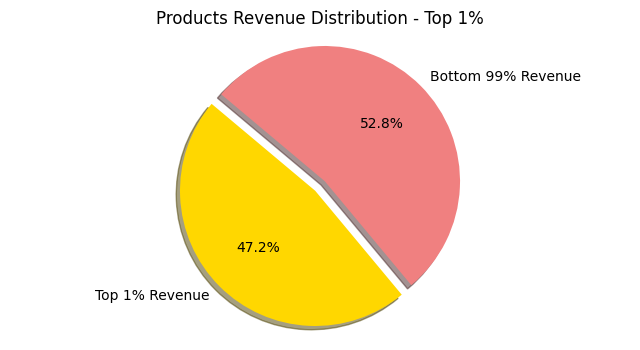

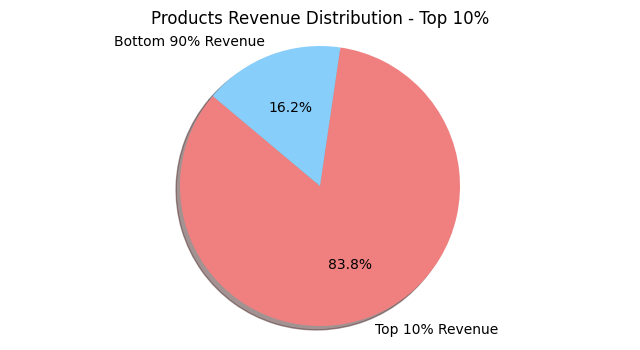

In [73]:
# Calculate the percentages
one_percent_share = (one_perc['prices'].sum() / total_rev) * 100
ten_percent_share = (ten_perc['prices'].sum() / total_rev) * 100

# Data for the pie charts
labels = ['Top 1% Revenue', 'Bottom 99% Revenue']
sizes = [one_percent_share, 100 - one_percent_share]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice (Top 1%)

# Create the first pie chart for the Top 1%
plt.figure(figsize=(8, 4))  # figure size
pie1 = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Products Revenue Distribution - Top 1%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

#save
#save_path_pie1 = os.path.join(path, '04 Analysis', 'Visualizations', 'Pie1.png')
#plt.savefig(save_path_pie1)

# Create the second pie chart for the Top 10%
plt.figure(figsize=(8, 4))  # figure size
pie10 = plt.pie([ten_percent_share, 100 - ten_percent_share], labels=['Top 10% Revenue', 'Bottom 90% Revenue'], colors=['lightcoral', 'lightskyblue'], autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Products Revenue Distribution - Top 10%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Specify the full file path for saving
#save_path_pie10 = os.path.join(path, '04 Analysis', 'Visualizations', 'Pie10.png')

# Save the figures as image files
#plt.savefig(save_path_pie10)


plt.show()


In [74]:
#Nightowls

night = df_full.groupby('Nightowl_Customer')['prices'].sum()

Text(0.5, 1.0, '92% of Revenue made between 9a - 5p')

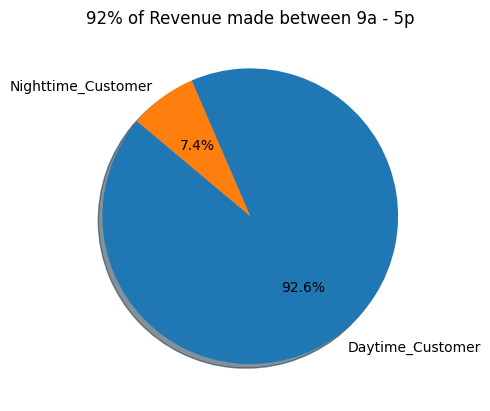

In [75]:
#pie chart

night_pie = plt.pie([round(night[0], -1), round(night[1], -1)], 
                    labels=['Daytime_Customer', 'Nighttime_Customer'],  
                    autopct='%1.1f%%', shadow=True, startangle=140)

#format
plt.title('92% of Revenue made between 9a - 5p')
#save
#plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Revenue_Hours.png'))

In [76]:
df_full[['median_order_frequency']].value_counts()

median_order_frequency
7.0                       5609571
6.0                       2938791
8.0                       2661694
5.0                       2459566
4.0                       2290619
                           ...   
27.5                         5005
26.5                         4434
29.5                         4056
1.5                           904
0.5                           109
Length: 61, dtype: int64

In [77]:
#Aggregate the max, mean, and min variables on a 
# customer-profile level for usage frequency and expenditure.

#aggregate by age group and median usage frequency
cust_prof = df_full.groupby(['age_group'])['median_order_frequency'].agg(['max', 'mean', 'min'])
cust_prof.head(), cust_prof.shape



(            max      mean  min
 age_group                     
 young      30.0  9.968750  0.0
 adult      30.0  9.929688  0.0
 midlife    30.0  9.968750  0.0
 elder      30.0  9.960938  0.0,
 (4, 3))

In [78]:
#create total expenditure column by customer_id and merge into df_full
df_full['total_expenditure'] = df_full.groupby('customer_id')['prices'].transform('sum')
df_full.columns.tolist(), df_full['total_expenditure'].describe()

(['order_id',
  'customer_id',
  'customer_order_number',
  'orders_day_of_week',
  'order_hour_of_day',
  'days_between_last_order',
  'first_order',
  'product_id',
  'add_to_cart_order',
  'reordered',
  'product_name',
  'aisle_id',
  'department_id',
  'prices',
  '_merge',
  'price_range_loc',
  'Busiest Days',
  'busiest_hours_of_day',
  'max_orders',
  'loyalty_flag',
  'avg_cust_spend',
  'Customer_Spend',
  'median_order_frequency',
  'Order_Frequency',
  'Gender',
  'State',
  'Age',
  'date_joined',
  'Dependents',
  'Marital_Status',
  'Income',
  'Region',
  'weekend_ratio',
  'weekend_customer',
  'age_group',
  'income_brackets',
  'top_one_percent',
  'top_ten_percent',
  'Children',
  'Nightowl_Orders',
  'Nightowl_Ratio',
  'Nightowl_Customer',
  'index',
  'department_names',
  'income_brackets_2',
  'total_expenditure'],
 count    3.099266e+07
 mean     3.423389e+03
 std      2.932014e+03
 min      5.000000e+00
 25%      1.245497e+03
 50%      2.540801e+03
 75%    

In [79]:
#aggregate by loyalty and total expenditure
loyal = df_full.groupby('loyalty_flag')['total_expenditure'].agg(['max', 'mean', 'min'])
loyal

,max,mean,min
loyalty_flag,,,
Loyal Customer,26649.994141,6162.686106,156.000000
New Customer,3170.588867,737.924316,5.000000
Regular Customer,12186.313477,2381.417476,12.998047


In [80]:
#Regional analysis by total customer spend

reg = df_full.groupby(['Region'])['total_expenditure'].agg(['mean', 'min', 'max'])
reg


,mean,min,max
Region,,,
Midwest,3363.465412,7.000000,26649.994141
Northeast,3444.441781,7.697266,22777.644531
South,3429.558149,6.798828,24319.194336
West,3455.738874,5.000000,18908.960938


In [81]:
# #top product by region
# reg_prod = df_full.groupby('Region')['product_name']
# top_name = reg_prod.groupby('product_name')['prices'].sum()
# top_name.sort_values(ascending=False, inplace=True)
# top_name.head(1)
# Group by 'Region' and 'product_name' to calculate the sum of prices for each product within each region
reg_prod = df_full.groupby(['Region', 'product_name'])['prices'].sum().reset_index()

# Find the top product for each region
top_products = reg_prod.groupby('Region').apply(lambda x: x.loc[x['prices'].idxmax()])

# Display the top product for each region
print(top_products[['Region', 'product_name', 'prices']])


              Region product_name        prices
Region                                         
Midwest      Midwest       Banana  1.301009e+06
Northeast  Northeast       Banana  9.820284e+05
South          South       Banana  1.866125e+06
West            West       Banana  1.423339e+06


Text(0.5, 1.0, 'Most Popular Product by Region: Banana')

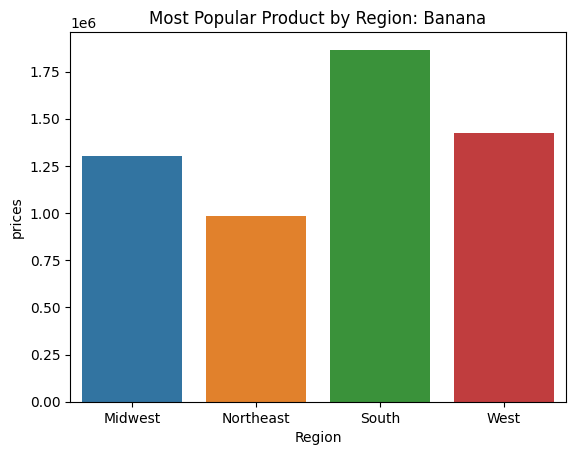

In [82]:
bar_prod = sns.barplot(x='Region', y='prices', data=top_products)
plt.title('Most Popular Product by Region: Banana')

In [83]:
#export
bar_prod.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Top_Prod_Region.png'))

# feature engineering
customer Profiles

In [84]:
df_full['age_group'].value_counts(), df_full['Dependents'].value_counts(), df_full['Marital_Status'].value_counts(), 

(young      8746779
 adult      8258069
 midlife    8170060
 elder      5817756
 Name: age_group, dtype: int64,
 3    7779452
 0    7747032
 2    7740199
 1    7725981
 Name: Dependents, dtype: int64,
 married                             21763021
 single                               5099271
 divorced/widowed                     2647761
 living with parents and siblings     1482611
 Name: Marital_Status, dtype: int64)

In [85]:
# This was crashing, so we found a vectorized implementation below
#create 4 profiles based on dependents, marriage status, and age group

# def customer_profile(row):
#     age_group = row['age_group']
#     dependents = row['Dependents']
#     marriage = row['Marital_Status']
    
#     if age_group == 'young' and marriage != 'married' and dependents > 0:
#         return 'Young Single Parent'
#     if age_group != 'young' and marriage != 'married' and dependents == 0:
#         return 'Single Adult No Kids'
#     if marriage == 'married' and dependents == 3:
#         return 'Large Family'
#     if marriage == 'married' and dependents ==0:
#         return 'Family No Kids'
#     else:
#         return 'Other'

# df_full['customer_profile'] = df_full.apply(customer_profile, axis=1)
# df_full['customer_profile'].value_counts()

# Feature Engineering
Customer Profiles:# 

In [86]:
#change df_full['age_group'] to be 3 groups, young adult, midlife, elder
#Age profile

# Create a new column with age groups
df_full['age_group'] = pd.cut(df_['Age'], bins=[17, 29, 60, 86], 
                         labels=['young adult', 'midlife', 'elder'],
                         )
# check the DataFrame 
df_full['age_group'].value_counts()

midlife        15048030
elder          10121613
young adult     5823021
Name: age_group, dtype: int64

In [87]:
# Young Single No Kids: Customers who are in the "young" age group, not married, and have no dependents.
# Young Married No Kids: Customers who are in the "young" age group, married, and have no dependents.
# Young Single With Kids: Customers who are in the "young" age group, not married, and have dependents.
# Young Married With Kids: Customers who are in the "young" age group, married, and have dependents.
# Midlife Single No Kids: Customers who are in the "midlife" age group, not married, and have no dependents.
# Midlife Married No Kids: Customers who are in the "midlife" age group, married, and have no dependents.
# Midlife Single With Kids: Customers who are in the "midlife" age group, not married, and have dependents.
# Midlife Married With Kids: Customers who are in the "midlife" age group, married, and have dependents.
# Elder Single No Kids: Customers who are in the "elder" age group, not married, and have no dependents.
# Elder Married No Kids: Customers who are in the "elder" age group, married, and have no dependents.
# Elder Single With Kids: Customers who are in the "elder" age group, not married, and have dependents.
# Elder Married With Kids: Customers who are in the "elder" age group, married, and have dependents.


In [88]:
# Vectorized implementation
conditions = [
    (df_full['age_group'] == 'young adult') & (df_full['Marital_Status'].isin(['single', 'divorced/widowed', 'living with parents and siblings'])) & (df_full['Dependents'] == 0),
    (df_full['age_group'] == 'young adult') & (df_full['Marital_Status'] == 'married') & (df_full['Dependents'] == 0),
    (df_full['age_group'] == 'young adult') & (df_full['Marital_Status'].isin(['single', 'divorced/widowed', 'living with parents and siblings'])) & (df_full['Dependents'] > 0),
    (df_full['age_group'] == 'young adult') & (df_full['Marital_Status'] == 'married') & (df_full['Dependents'] > 0),
    (df_full['age_group'] == 'midlife') & (df_full['Marital_Status'].isin(['single', 'divorced/widowed', 'living with parents and siblings'])) & (df_full['Dependents'] == 0),
    (df_full['age_group'] == 'midlife') & (df_full['Marital_Status'] == 'married') & (df_full['Dependents'] == 0),
    (df_full['age_group'] == 'midlife') & (df_full['Marital_Status'].isin(['single', 'divorced/widowed', 'living with parents and siblings'])) & (df_full['Dependents'] > 0),
    (df_full['age_group'] == 'midlife') & (df_full['Marital_Status'] == 'married') & (df_full['Dependents'] > 0),
    (df_full['age_group'] == 'elder') & (df_full['Marital_Status'].isin(['single', 'divorced/widowed', 'living with parents and siblings'])) & (df_full['Dependents'] == 0),
    (df_full['age_group'] == 'elder') & (df_full['Marital_Status'] == 'married') & (df_full['Dependents'] == 0),
    (df_full['age_group'] == 'elder') & (df_full['Marital_Status'].isin(['single', 'divorced/widowed', 'living with parents and siblings'])) & (df_full['Dependents'] > 0),
    (df_full['age_group'] == 'elder') & (df_full['Marital_Status'] == 'married') & (df_full['Dependents'] > 0)
]

choices = ['Young Single No Kids', 'Young Married No Kids', 'Young Single With Kids', 'Young Married With Kids',
           'Midlife Single No Kids', 'Midlife Married No Kids', 'Midlife Single With Kids', 'Midlife Married With Kids',
           'Elder Single No Kids', 'Elder Married No Kids', 'Elder Single With Kids', 'Elder Married With Kids']

df_full['customer_profile'] = np.select(conditions, choices, default='Other')
df_full['customer_profile'].value_counts()


Midlife Married With Kids    11285598
Elder Married With Kids       7586073
Midlife Single No Kids        3762432
Young Married With Kids       2891350
Elder Single No Kids          2535540
Young Single With Kids        1482611
Young Single No Kids          1449060
Name: customer_profile, dtype: int64

# 12 possible customer profiles leads to  realized profiles and 'other'

In [89]:
# export cust_reg as csv for further analysis
#cust_reg.to_csv(os.path.join(path, '02 Data', 'customer_region.csv'))


In [90]:
#export df_full as pkl file to avoid issues from kernel crashing
df_full.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Df_Cust_Profs.pkl'))


In [91]:
# #make mapping table for tableau geographic visualizations
# map_reg = df_full[['State', 'Region']].drop_duplicates()
# map_reg.head(10), map_reg.shape

In [92]:
#compare 7 customer profiles and regions

cust_reg = df_full.groupby(['customer_profile', 'Region'])['total_expenditure'].agg(['count', 'mean', 'min', 'max', 'sum'])
cust_reg

count         mean        min  \
customer_profile          Region                                       
Elder Married With Kids   Midwest    1763209  3265.901794  12.000000   
                          Northeast  1350107  3512.283149  11.402344   
                          South      2525284  3387.546277   6.798828   
                          West       1947473  3454.742578  11.203125   
Elder Single No Kids      Midwest     595387  3577.171363  16.096680   
                          Northeast   460654  3335.992609  17.097656   
                          South       838950  3522.712671  15.695312   
                          West        640549  3438.843546  20.295898   
Midlife Married With Kids Midwest    2653160  3399.463366   7.000000   
                          Northeast  2003741  3457.293167  10.000000   
                          South      3743201  3402.671125  10.000000   
                          West       2885496  3487.251723  10.398438   
Midlife Single No Kids    Midwest     899005  3384.408575  12.599609   
                          Northeast   630434  3212.753388   7.697266   
                          South      1250457  3459.114938  11.099609   
                          West        982536  3547.341365   5.000000   
Young Married With Kids   Midwest     675159  3324.339998  34.400391   
                          Northeast   503609  3484.396257  24.603516   
                          South       961720  3436.186134  11.398438   
                          West        750862  3366.926887  15.000000   
Young Single No Kids      Midwest     330095  3309.954748  40.697266   
                          Northeast   264740  3387.545360  25.101562   
                          South       494945  3532.815005  24.000000   
                          West        359280  3227.473401  10.498047   
Young Single With Kids    Midwest     351692  3291.045338  20.000000   
                          Northeast   256783  3731.139719  35.800781   
                          South       505905  3497.047567  14.402344   
                          West        368231  3402.854581  21.798828   

                                              max           sum  
customer_profile          Region                                 
Elder Married With Kids   Midwest    26649.994141  5.758467e+09  
                          Northeast  22777.644531  4.741958e+09  
                          South      19024.785156  8.554516e+09  
                          West       18331.501953  6.728018e+09  
Elder Single No Kids      Midwest    17519.114258  2.129801e+09  
                          Northeast  17096.540039  1.536738e+09  
                          South      24319.194336  2.955380e+09  
                          West       16177.197266  2.202748e+09  
Midlife Married With Kids Midwest    20636.345703  9.019320e+09  
                          Northeast  21509.728516  6.927520e+09  
                          South      22696.594727  1.273688e+10  
                          West       18908.960938  1.006245e+10  
Midlife Single No Kids    Midwest    20238.495117  3.042600e+09  
                          Northeast  15262.964844  2.025429e+09  
                          South      20314.125977  4.325474e+09  
                          West       13562.327148  3.485391e+09  
Young Married With Kids   Midwest    14263.125000  2.244458e+09  
                          Northeast  18350.867188  1.754773e+09  
                          South      18468.113281  3.304649e+09  
                          West       15856.664062  2.528097e+09  
Young Single No Kids      Midwest    18882.581055  1.092600e+09  
                          Northeast  17585.588867  8.968188e+08  
                          South      14338.513672  1.748549e+09  
                          West       14367.837891  1.159567e+09  
Young Single With Kids    Midwest    11860.749023  1.157434e+09  
                          Northeast  15395.317383  9.580933e+08  
                          Sout

<!--Part 1

<!-- Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the 
merged version of your data that contains the new customers column.
Consider any security implications that might exist for this new data. You’ll need to address any 
PII data in the data before continuing your analysis.
The Instacart officers are interested in comparing customer behavior in different geographic areas. 
Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” 
column from your customers data set.
Use the region information in this Wikipedia article to create your column (you only need to create regions, 
not divisions). -->
<!-- Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You 
can do this by crossing the variable you just created with the spending flag.)
 -->
<!-- The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an 
exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the 
data. Make sure you export this sample.
 -->
<!-- The marketing and business strategy units at Instacart want to create more-relevant marketing strategies
    for different products and are, thus, curious about customer profiling in their database. Create a 
profiling variable based on age, income, certain goods in the “department_id” column, and number of 
dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can 
think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics
would lead you to the profile “Single adult” or “Young parent.”)
 -->

<!-- Create an appropriate visualization to show the distribution of profiles.
 -->

<!-- Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
 -->

Compare your customer profiles with regions and departments. Can you identify a link between them? 


Customers may demonstrate different behaviors across regions, which could make this information important.


Produce suitable charts to illustrate your results and export them in your project folder.


Tidy up your script, export your final data set, and save your notebook.